### Introduction to Regression with Neutral Networks in Tensorflow

predicting a numerical variable based on some other combination of variables

In [1]:
#import tensorflow
import tensorflow as tf

## creating data to view and fit

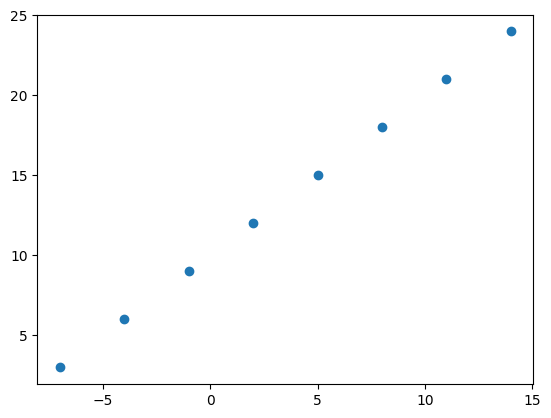

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# create lables
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,Y)
plt.show()



## Input and output shapes  

In [3]:
# create  demo tensor for our housing price prediction problem
hause_info = tf.constant(['bet','bath','garage'])
hause_price = tf.constant([939700])


2024-03-31 21:40:33.593453: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-31 21:40:33.593477: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-31 21:40:33.593489: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-31 21:40:33.593512: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-31 21:40:33.593531: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
input_shape = X.shape
output_shape = Y.shape

In [5]:
# turn our numpy to tensor
X = tf.convert_to_tensor(X)
Y = tf.convert_to_tensor(Y)


## steps in modeling with tensorflow

1. creating a model - define the input and output layers as well as the hidden layers of a deep learning model.
2. compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. fitting a model - letting the model try to find patterns between X & Y (features and labels)

In [6]:
# set random seed
tf.random.set_seed(42)

# create a model using the Sequential API

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
])

# compile the model
# mean absolute error
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),# sgd is short for stochasitc gradient descent
             metrics=["mae"])

# fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=1000)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: 20.3799 - mae: 20.3799
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 20.0987 - mae: 20.0987
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19.8174 - mae: 19.8174

2024-03-31 21:40:33.869770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.8174 - mae: 19.8174
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.5362 - mae: 19.5362
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.2549 - mae: 19.2549
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.9737 - mae: 18.9737
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.6924 - mae: 18.6924
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.4112 - mae: 18.4112
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.1299 - mae: 18.1299
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.8487 - mae: 17.8487
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.5674 - mae: 17.5674
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.2862 - mae: 17.2862
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.0049 - mae: 17.0049
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.7237 - mae: 16.7237
Epoch 15/1000
1/1 ━━━━━━

In [7]:
# try and make a predicion using our model
model.predict(tf.convert_to_tensor([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[27.906145]], dtype=float32)

### improving our model

we can improve our model, by altering the steps we took to create a model.

1.**creating a model** - era we might add more layers,increase the number of hidden units (all called neurons)
within each of the hiden layers, change the activation function of each layer.
2.**compiling a model** - change the loss function, optimizer, and evaluation metrics.change the **learnin rate** of optimization function

3.**fitting a model** - more epochs, more data

In [8]:
# create a model using the Sequential API

model = tf.keras.Sequential([
  tf.keras.layers.Dense(50),#hidden layer
  tf.keras.layers.Dense(1),
  
  
])

# compile the model
# mean absolute error
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),# sgd is short for stochasitc gradient descent
             metrics=["mae"])

# fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - loss: 14.3138 - mae: 14.3138
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 13.5999 - mae: 13.5999
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.8914 - mae: 12.8914
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.1866 - mae: 12.1866
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.4831 - mae: 11.4831
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.7780 - mae: 10.7780
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 10.0683 - mae: 10.0683
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.3507 - mae: 9.3507
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.6223 - mae: 8.6223
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.8802 - mae: 7.8802
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.1215 - mae: 7.1215
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.6747 - mae: 6.6747
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/

In [9]:
model.predict(tf.convert_to_tensor([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[26.404327]], dtype=float32)

### Evaluate the model

in practice a typical workflow you'll go through when building neural networks

`````
Build a model -> fit it -> evaluate it ->tweak a model ->fit it -> evaluate it -> tweak a model ->fit it -> evaluate it ->tweak a model ->fit...
````

when it comes to evaluating the model... there are 3 words you should memorize:

>"Visualize", "Visualize", "Visualize"

its a good idea to visualize:

* The data - what data are we working with

* The model itself- what model are we using

* the training of a model
* th predictions of the model

In [10]:
#make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [11]:
Y = X + 10

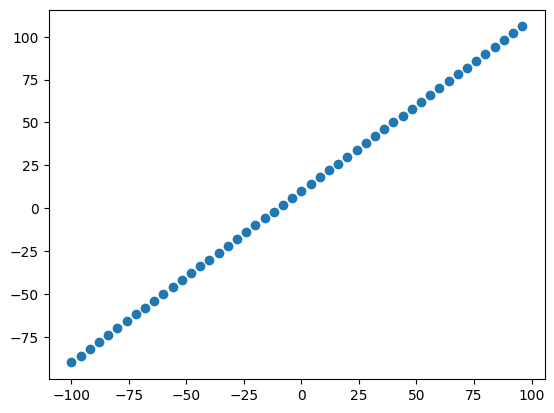

In [12]:
#visualize the data
plt.scatter(X, Y)

### the 3 sets ...

* training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* validation set - the model gets tuned on this data,which is typically 10-15% of the data available.
* test set - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [13]:
# check the lenght of the data we have
len(X) 

50

In [14]:
# split the data to train and test sets
X_train = X[:40]
Y_train = Y[:40]

X_test = X[40:]
Y_test = Y[40:]

### Visualing the data

Now we've got our data in training and test sets... lets visualize the data

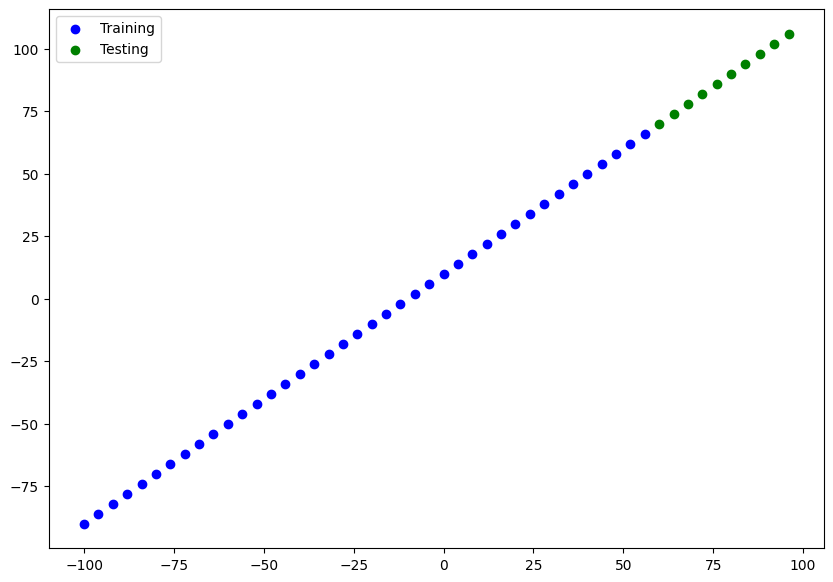

In [15]:
plt.figure(figsize=(10,7))
# plot training data in blue


plt.scatter(X_train, Y_train, c='b',label='Training')

plt.scatter(X_test, Y_test, c='g',label='Testing')
plt.legend()

In [16]:
# lets have a look at how to build neural network for our data

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100,verbose=0)

### visualizing the model

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [18]:
# lets create a model which builds automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1],name='input'),# input_shape build automatic
  tf.keras.layers.Dense(1,name="output_layer")
], name="model-kuni")

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "model-kuni"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* total params - total number of parameters in the model.
* trainable params - these are the trainable parameters the model can update as it trains.
* non-trainable params - these arent updated during training (this is typically when you bring in already learn patterns from other models during **transfer learning**)

resource: mit introduction to deep learning

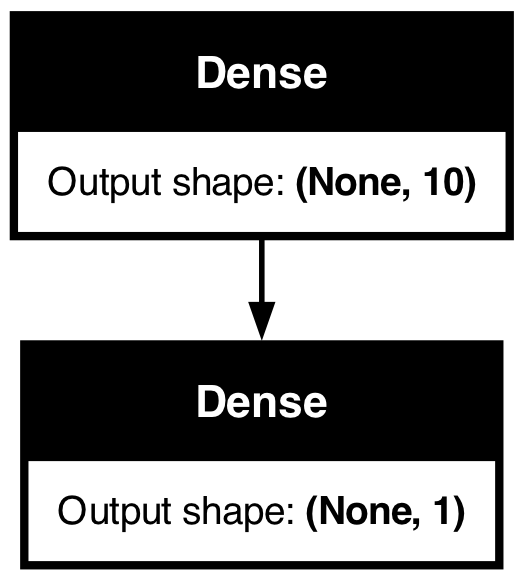

In [20]:
from keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualizing our model's predictions

to visualize predictions, it is a good ideaa to plot them against the fround truth labels.

often you'll see this in the form of `y_test` or `y_true` versus `y_pred`(ground truth versus your model's predictions)

In [21]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[-24.558323],
       [-26.195549],
       [-27.83277 ],
       [-29.469986],
       [-31.107204],
       [-32.74443 ],
       [-34.381653],
       [-36.018875],
       [-37.6561  ],
       [-39.29332 ]], dtype=float32)

In [22]:
# lets create a plotting function
def plot_predictions(train_data=X_train, train_labels=Y_train,test_data=X_test,test_labels=Y_test,predictions=y_pred):


    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b',label='Training')

    # plot testing data in green
    plt.scatter(test_data, test_labels, c='g',label='Testing')

    # plot predictions in red
    plt.scatter(test_data, predictions, c='r',label='Predictions')

    plt.legend()
    plt.show()

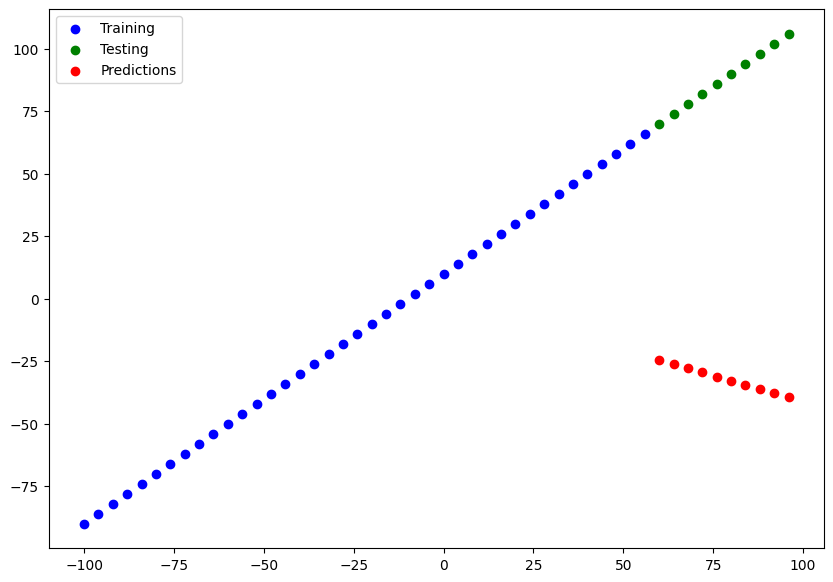

In [23]:
plot_predictions()

### Evaluating the model's predictions with regression evaluation metrics

Dependng on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're workinh on a regression, two of the main metrics :
* Mae - mean absolute error , "on avarage, how wrong is each of my model's predictions."
* MSE - mean squared error, "square the average errors"


In [24]:
# evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - loss: 119.9258 - mae: 119.9258


[119.92581939697266, 119.92581939697266]

In [25]:
# calculate the absolute error
tf.keras.losses.mae(Y_test, tf.squeeze(y_pred)) # same shape as y_test

<tf.Tensor: shape=(), dtype=float32, numpy=119.92582>

In [26]:
tf.squeeze(y_pred) # remove one dimension

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-24.558323, -26.195549, -27.83277 , -29.469986, -31.107204,
       -32.74443 , -34.381653, -36.018875, -37.6561  , -39.29332 ],
      dtype=float32)>

In [27]:
# calculate the mean squared error
tf.keras.losses.mse(Y_test, tf.squeeze(y_pred)) # same shape as y_test


<tf.Tensor: shape=(), dtype=float32, numpy=14644.374>

In [28]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.losses.mae(y_true, tf.squeeze(y_pred) )

def mse(y_true, y_pred):
  return tf.keras.losses.mse(y_true, tf.squeeze(y_pred))    

### running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it Build a model -> fit it -> evaluate it -> tweak it ...

1.Get more data - get mote examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2.Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Lets do 3 model experiment

1.`model 1` same as original, 1 layer, trained for 100 epochs

2.`model 2` same as original, 2 layers, trained for 100 epochs

3.`model 3` same as original, 3 layers, trained for 500 epochs



In [29]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 71.0543 - mae: 76.5386 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37.1907 - mae: 41.4791 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.8313 - mae: 10.6103 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8466 - mae: 8.2326 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5615 - mae: 8.8856 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1538 - mae: 7.8360 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.0647 - mae: 10.7988 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.7940 - mae: 7.6408 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.8709 - mae: 11.9707 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7766 - mae: 8.1506 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2304 - mae: 8.6954 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1627 - mae: 8.5621 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


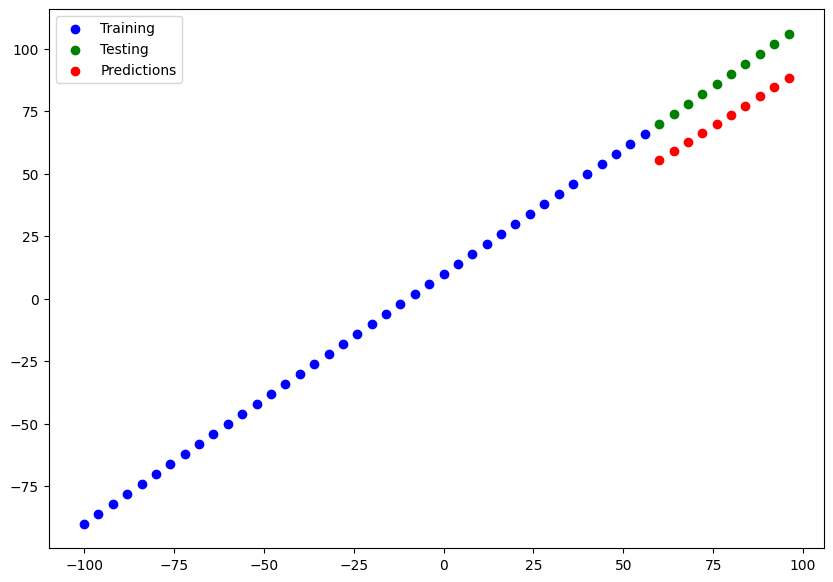

In [30]:
#make and plot for model 1
y_pred_1 = model_1.predict(X_test)
plot_predictions(test_data=X_test, test_labels=Y_test, predictions=y_pred_1)

In [31]:
#calculate evaluation
mae_1 = mae(Y_test,y_pred_1)
mse_1 = mse(Y_test,y_pred_1)
mae_1, mse_1


(<tf.Tensor: shape=(), dtype=float32, numpy=16.120277>,
 <tf.Tensor: shape=(), dtype=float32, numpy=261.0877>)

In [32]:
#model 2
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(50,activation='relu'),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])#mse

model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 27.2024 - mae: 31.7736 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.7688 - mae: 14.7508 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.2182 - mae: 15.1004 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.0947 - mae: 15.0282 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.0809 - mae: 16.5842 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.6682 - mae: 18.0339 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0870 - mae: 6.0526 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.6706 - mae: 9.0982
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4406 - mae: 8.3282 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.7412 - mae: 11.6832 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.8754 - mae: 13.7524 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.0376 - mae: 9.9075
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


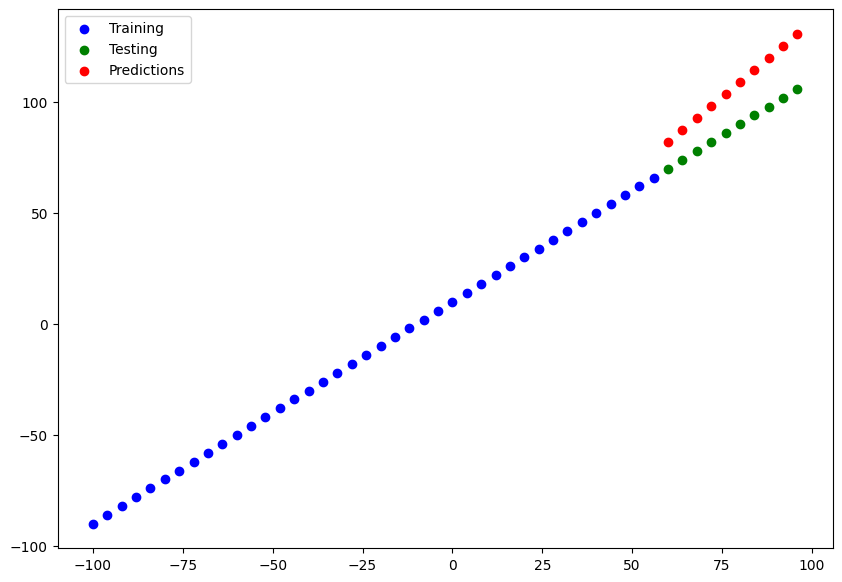

In [33]:
y_pred_1 = model_2.predict(X_test)
plot_predictions(test_data=X_test, test_labels=Y_test, predictions=y_pred_1)

In [34]:
mae_2 = mae(Y_test,y_pred_1)
mse_2 = mse(Y_test,y_pred_1)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=18.438025>,
 <tf.Tensor: shape=(), dtype=float32, numpy=356.3291>)

In [35]:
#model 3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([

  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])#mse

model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 31.8146 - mae: 33.0569 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.1573 - mae: 27.2315 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.6197 - mae: 21.5108 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.3024 - mae: 15.9249 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.2762 - mae: 10.7297 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9983 - mae: 7.7807 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.0284 - mae: 9.8751
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.1563 - mae: 11.0966 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.4413 - mae: 11.4535 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.0821 - mae: 11.1489 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.2376 - mae: 10.3450 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0340 - mae: 9.1710 
Epoch 13/100
2/2 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


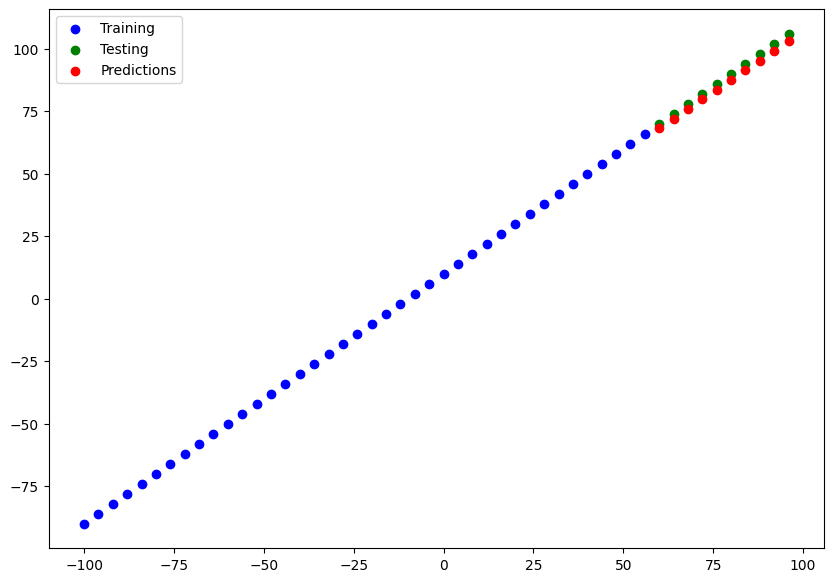

In [36]:
y_pred_1 = model_3.predict(X_test)
plot_predictions(test_data=X_test, test_labels=Y_test, predictions=y_pred_1)

In [37]:
mae_3 = mae(Y_test,y_pred_1)
mse_3 = mse(Y_test,y_pred_1)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=2.4016006>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.8810306>)

### comparing the result of the experiment


In [38]:
import pandas as pd

model_results =[["model_1",mae_1.numpy(),mse_1.numpy()],["model_2",mae_2.numpy(),mse_2.numpy()],["model_3",mae_3.numpy(),mse_3.numpy()]]

all_result = pd.DataFrame(model_results,columns=['model','mae','mse'])
all_result

,model,mae,mse
0,model_1,16.120277,261.087708
1,model_2,18.438025,356.329102
2,model_3,2.401601,5.881031


## tracking your experiment

one really good habit in ml is to tracking the results of experiments.
 and when doing so, it can be tedious if you're running lots of experiments.
 lickily, there are tools to help us

 **resource**: 
 * TensorBoard - a component of the tensorflow lib to help track modelling experiments
 * weights and biases - a tool for tracking all kind of ml experients (plugs straight to tensorboard).

## saving our models

saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

there are two main formats

* the savedmodel format
* the HDF5 format


In [39]:
# save the model
#model = create_model()
model_2.save("./Users/pouria/Desktop/a.keras")# add .h5 extention

### Load the model

In [40]:
# load the save model
loaded_model_2 = tf.keras.models.load_model("./Users/pouria/Desktop/a.keras")
#loaded_model_2.summary()
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (616.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### A Larger example

In [41]:
# read the insurance dataset
insurance = pd.read_csv('/Users/pouria/Desktop/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [42]:
#One hot encoding to make numerical from charecters
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [43]:
#Create X and Y values

#Build a neutral network (sort of like model_2 above)
X = insurance_one_hot.drop(columns='charges')
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [44]:
Y = insurance_one_hot['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [45]:
#create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [46]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])#mse

with tf.device('/cpu:0'):model_4.fit(X_train, Y_train, epochs=100)

Epoch 1/100


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10090.8643 - mae: 10092.4219  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7534.2549 - mae: 7535.7476 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7617.3618 - mae: 7619.0288 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7195.9888 - mae: 7197.3853 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7541.0654 - mae: 7542.8315 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7524.3081 - mae: 7524.6821 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7869.1909 - mae: 7871.1401 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7552.5352 - mae: 7554.3242 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7503.6772 - mae: 7505.2246 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7562.9795 - mae: 7563.5879
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7720.3594 - mae: 7719.8784 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [47]:
# check the results on test dats
model_4.evaluate(X_test, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8137.9253 - mae: 8102.2324 


[8255.3369140625, 8076.873046875]

In [61]:
#create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


((1070, 11), (1070,))

In [59]:
#improve our model_4 (insurance)
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])#mse

with  tf.device('/cpu:0'):history = model_5.fit(X_train, Y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13276.0088 - mae: 13278.1914  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13061.7100 - mae: 13064.2070
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12083.6357 - mae: 12086.7881
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9567.0459 - mae: 9569.0771  
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7565.1924 - mae: 7565.1606
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7470.9336 - mae: 7471.0918
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7430.5303 - mae: 7430.6748
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7390.8330 - mae: 7391.0142
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7352.5088 - mae: 7352.6973
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7312.7788 - mae: 7313.0234
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7273.8613 - mae: 7274.1426
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

Text(0.5, 0, 'epochs')

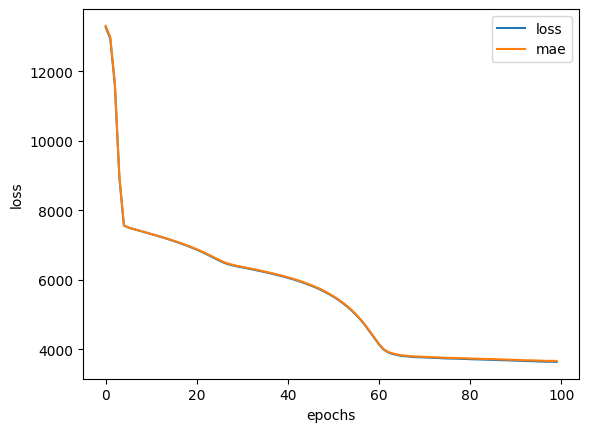

In [60]:
# plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### How long should we train out model?

it depends but we can use EarlyStopping Callback from Tensorflow, which is tensorflow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing Data (normalization and standardizion)

In terms of scaling values, neural networks tend to prefer normalization.

if you're not sure on which to use, you could try both and see which performs better.

In [63]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

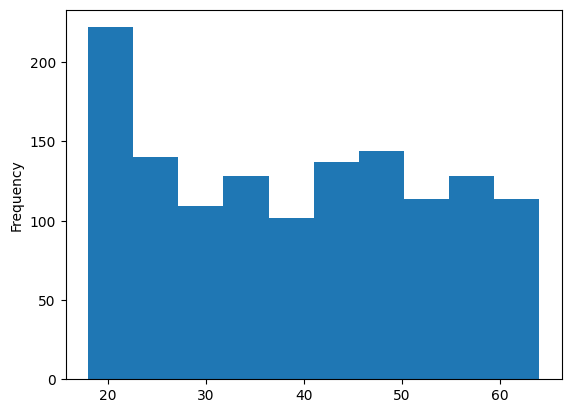

In [62]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

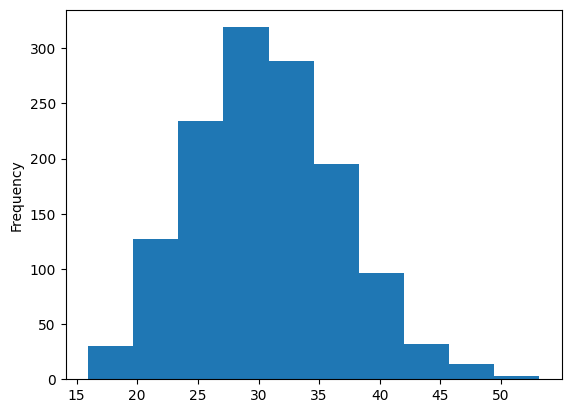

In [64]:
X['bmi'].plot(kind='hist')

to prepare out data we can barrow a few classes from Scikit-Learn.

In [68]:
X = insurance.drop(columns='charges')
Y = insurance['charges']

In [69]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#create a column transformer
ct = make_column_transformer(
  (MinMaxScaler(), ['age', 'bmi']),# turn all values in these columns between 0 and 1
  (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)
#create X and Y

#build our train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

#fit the column transformer to our training data
ct.fit(X_train)

#transform our training data and test data with normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [70]:
X_train_normal[0]

array([0.60869565, 0.10734463, 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ])

In [71]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [73]:
#improve our model_4 (insurance)
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])#mse

with  tf.device('/cpu:0'):history = model_6.fit(X_train_normal, Y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13257.9795 - mae: 13260.4053  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12168.2324 - mae: 12171.8936
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8500.9463 - mae: 8500.9033
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7590.3535 - mae: 7590.3867
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7115.4375 - mae: 7115.4375
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6512.1494 - mae: 6512.2534
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5632.4873 - mae: 5632.9829
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4493.2520 - mae: 4494.3271
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3844.1140 - mae: 3845.3154
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3729.2864 - mae: 3730.6309
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3721.2734 - mae: 3722.6965
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms